In [15]:
# IMPORTS LIBRARY
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = os.listdir("./data/raw")
print(data)

['vauxhall.csv', 'bmw.csv', 'unclean cclass.csv', 'vw.csv', 'hyundi.csv', 'audi.csv', 'unclean focus.csv', 'toyota.csv', 'ford.csv', 'focus.csv', 'skoda.csv', 'cclass.csv', 'merc.csv']


In [29]:
for dataset in data:
  df = pd.read_csv('./data/raw/' + dataset)
  print(df.columns.to_list())

['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
['model', 'year', 'price', 'transmission', 'mileage', 'fuel type', 'engine size', 'mileage2', 'fuel type2', 'engine size2', 'reference']
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax(£)', 'mpg', 'engineSize']
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
['model', 'year', 'price', 'transmission', 'mileage', 'fuel type', 'engine size', 'mileage2', 'fuel type2', 'engine size2', 'reference']
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',

In [31]:
car = pd.DataFrame()
for dataset in data:
    path = "./data/raw/"+dataset
    if "unclean" not in dataset:
        df = pd.read_csv(path)
        df['brand'] = dataset.replace(".csv", "")
        car = pd.concat([car,df])

In [32]:
car.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
0,Corsa,2018,7885,Manual,9876,Petrol,145.0,55.4,1.4,vauxhall,NaN
1,Corsa,2019,11995,Manual,2500,Petrol,145.0,54.3,1.4,vauxhall,NaN
2,Corsa,2017,9777,Automatic,9625,Petrol,145.0,47.9,1.4,vauxhall,NaN
3,Corsa,2016,8500,Manual,25796,Petrol,30.0,55.4,1.4,vauxhall,NaN
4,Corsa,2019,10000,Manual,3887,Petrol,145.0,43.5,1.4,vauxhall,NaN


# Deskripsi Dataset

Dataset ini berisi informasi mengenai berbagai atribut mobil yang digunakan untuk keperluan analisis harga mobil.
Tabel berikut menjelaskan kolom-kolom yang terdapat dalam dataset ini:

| Kolom        | Deskripsi                                                                 |
|--------------|---------------------------------------------------------------------------|
| model        | Model mobil                                                               |
| year         | Tahun pembuatan mobil                                                     |
| price        | Harga mobil dalam satuan mata uang tertentu                               |
| transmission | Jenis transmisi yang digunakan pada mobil                                 |
| mileage      | Jarak tempuh yang telah ditempuh oleh mobil dalam satuan mil              |
| fuelType     | Jenis bahan bakar yang digunakan pada mobil                               |
| tax          | Pajak tahunan yang harus dibayar untuk mobil                              |
| mpg          | Efisiensi bahan bakar dalam mil per galon                                  |
| engineSize   | Ukuran mesin mobil dalam liter                                            |
| brand        | Brand mobil                                                               |

<Axes: >

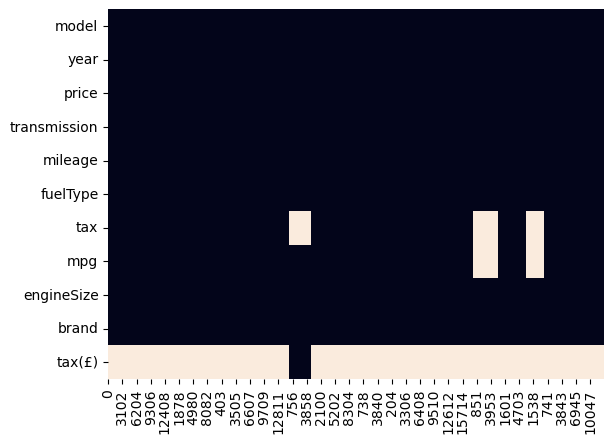

In [72]:
ax = plt.axes()
sns.heatmap(car.isna().transpose(), cbar=False, ax=ax)

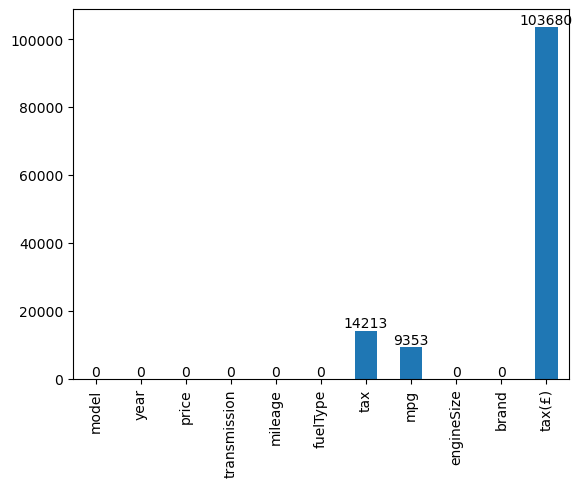

In [63]:
ax = car.isnull().sum().plot.bar()
ax.bar_label(ax.containers[0])
plt.show()

In [73]:
car.drop(['tax(£)'], axis=1, inplace=True)

<Axes: >

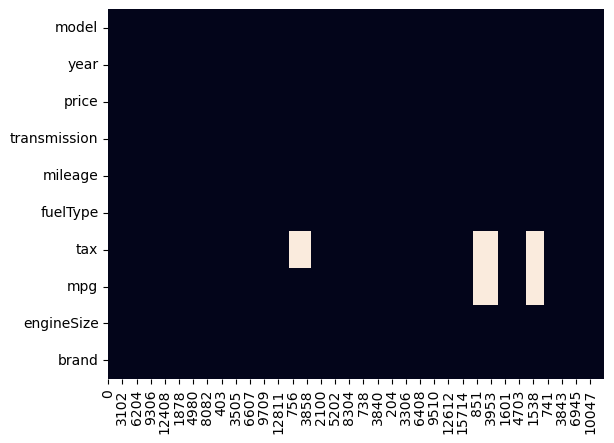

In [74]:
ax = plt.axes()
sns.heatmap(car.isna().transpose(), cbar=False, ax=ax)

In [76]:
car[['tax','mpg']] = car[['tax','mpg']].fillna(car[['tax','mpg']].median())

<Axes: >

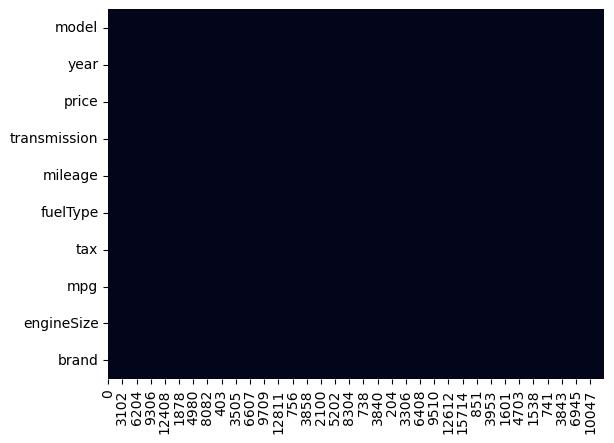

In [77]:
ax = plt.axes()
sns.heatmap(car.isna().transpose(), cbar=False, ax=ax)

In [78]:
car.describe()

,year,price,mileage,tax,mpg,engineSize
count,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000
mean,2017.098028,16890.124046,23025.928469,123.496315,55.092130,1.661644
std,2.130057,9756.266820,21176.423684,59.694307,15.429435,0.557058
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000
75%,2019.000000,20940.000000,32236.000000,145.000000,61.400000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [79]:
#check for duplicate
car.duplicated().sum()

2281

In [80]:
car.drop_duplicates(inplace=True)

In [81]:
car.duplicated().sum()

0

In [82]:
car['mileage'].describe()

count    106259.000000
mean      23220.133937
std       21127.111496
min           1.000000
25%        7724.000000
50%       17515.000000
75%       32449.000000
max      323000.000000
Name: mileage, dtype: float64

In [83]:
car['price'].describe()

count    106259.000000
mean      16863.144590
std        9780.204601
min         450.000000
25%       10190.000000
50%       14579.000000
75%       20883.500000
max      159999.000000
Name: price, dtype: float64

In [89]:
car["model"].value_counts()

model
 Focus      9313
 C Class    7491
 Fiesta     6509
 Golf       4797
 Corsa      3285
            ... 
180            1
 Ranger        1
230            1
220            1
200            1
Name: count, Length: 195, dtype: int64

In [90]:
#will rename focus with ford
car['brand'] = car['brand'].replace('focus','ford')
#only mercedes cclass there is no car brand name cclass beside mercedes
car['brand'] = car['brand'].replace('cclass','mercedes')
car['brand'] = car['brand'].replace('merc','mercedes')

In [93]:
#what is the total units sold per month of the year
model = car.groupby(["brand", "transmission"])["price"].mean().reset_index()
model_price = pd.DataFrame(model)

model_price.head(50).transpose()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
brand,audi,audi,audi,bmw,bmw,bmw,ford,ford,ford,hyundi,...,toyota,toyota,toyota,vauxhall,vauxhall,vauxhall,vauxhall,vw,vw,vw
transmission,Automatic,Manual,Semi-Auto,Automatic,Manual,Semi-Auto,Automatic,Manual,Semi-Auto,Automatic,...,Manual,Other,Semi-Auto,Automatic,Manual,Other,Semi-Auto,Automatic,Manual,Semi-Auto
price,28157.134328,16024.305305,27133.96861,22333.308865,14538.580684,27337.505284,15704.979569,12052.667145,14461.153659,16291.203647,...,9541.009755,12795.0,14797.137795,12122.051651,10046.488114,18664.333333,12359.030172,22489.758496,13700.713483,21605.172124


In [94]:
#Total sales per car brand vs fuetype
fig = plt.box(car, x="brand", y="price", color="fuelType",      
              title='car price per transmission type')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

TypeError: box() got an unexpected keyword argument 'x'